In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from skbio.stats.composition import ilr,clr,alr
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
dataframe = pd.DataFrame(pd.read_csv("./wine-quality-white-and-red.csv"))
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates
0,24.104683,0.929752,1.239669,71.280992,0.154959,0.154959,0.585399,1.549587
1,68.292683,3.252033,3.685637,17.344173,0.531165,0.151762,1.430894,5.311653
2,49.702399,1.718108,2.454439,42.339081,0.306805,0.184083,0.595202,2.699883
3,42.500443,1.357653,1.888909,50.174134,0.342365,0.277433,1.097928,2.361136
4,42.500443,1.357653,1.888909,50.174134,0.342365,0.277433,1.097928,2.361136


In [13]:
columns_to_select = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates']
df = dataframe[columns_to_select]
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,0.45
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.49
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.44
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.40
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.40


In [14]:
df['free sulfur dioxide'] = df['free sulfur dioxide']/1000
df['total sulfur dioxide'] = df['total sulfur dioxide']/1000
df.head()

/tmp/ipykernel_15043/4216413678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['free sulfur dioxide'] = df['free sulfur dioxide']/1000
/tmp/ipykernel_15043/4216413678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total sulfur dioxide'] = df['total sulfur dioxide']/1000


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates
0,7.0,0.27,0.36,20.7,0.045,0.045,0.170,0.45
1,6.3,0.30,0.34,1.6,0.049,0.014,0.132,0.49
2,8.1,0.28,0.40,6.9,0.050,0.030,0.097,0.44
3,7.2,0.23,0.32,8.5,0.058,0.047,0.186,0.40
4,7.2,0.23,0.32,8.5,0.058,0.047,0.186,0.40


In [15]:
# Chuyển đổi các giá trị để tổng mỗi hàng bằng 1
df = df.div(df.sum(axis=1), axis=0)*100
df.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates
0,24.104683,0.929752,1.239669,71.280992,0.154959,0.154959,0.585399,1.549587
1,68.292683,3.252033,3.685637,17.344173,0.531165,0.151762,1.430894,5.311653
2,49.702399,1.718108,2.454439,42.339081,0.306805,0.184083,0.595202,2.699883
3,42.500443,1.357653,1.888909,50.174134,0.342365,0.277433,1.097928,2.361136
4,42.500443,1.357653,1.888909,50.174134,0.342365,0.277433,1.097928,2.361136


In [31]:
# Chuyển đổi CLR
clr_transformed = clr(df + 1e-10)  # Thêm một giá trị nhỏ để tránh log(0)

# Chuyển đổi thành DataFrame
clr_df = pd.DataFrame(clr_transformed, columns=columns_to_select)

# Xác định biến đầu ra

# Loại bỏ các điểm bất thường
y = dataframe['residual sugar']

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(clr_df, y, test_size=0.3, random_state=42)

# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

In [32]:
# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 3.626036062120655
R^2 Score: 0.8456228425565901


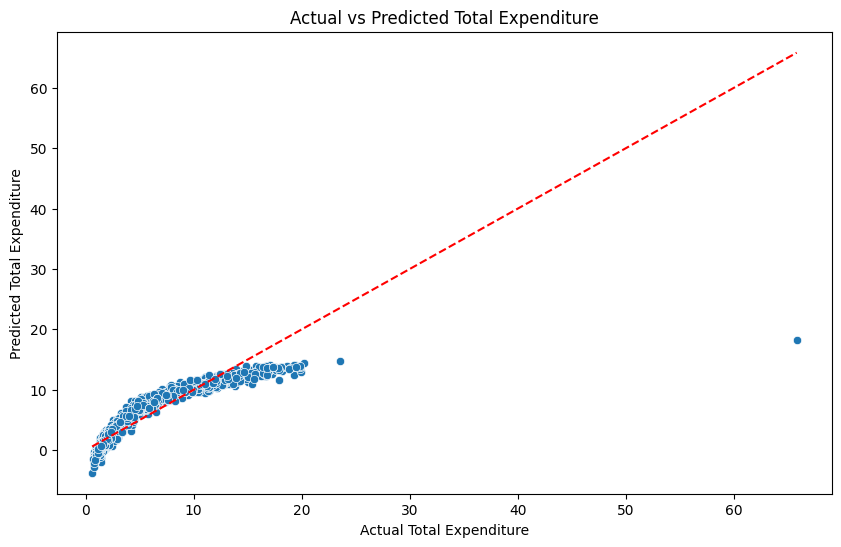

In [24]:
# Vẽ biểu đồ Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Total Expenditure')
plt.ylabel('Predicted Total Expenditure')
plt.title('Actual vs Predicted Total Expenditure')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

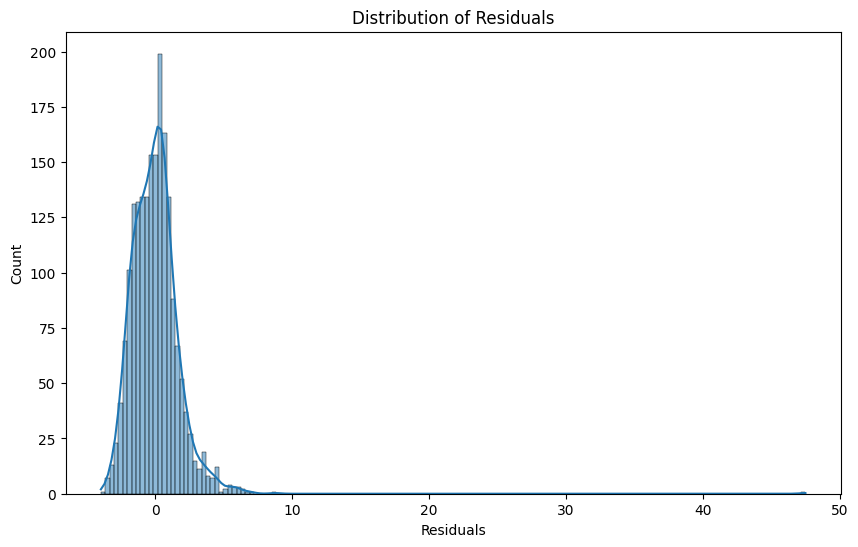

In [25]:
# Vẽ biểu đồ phân phối phần dư
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

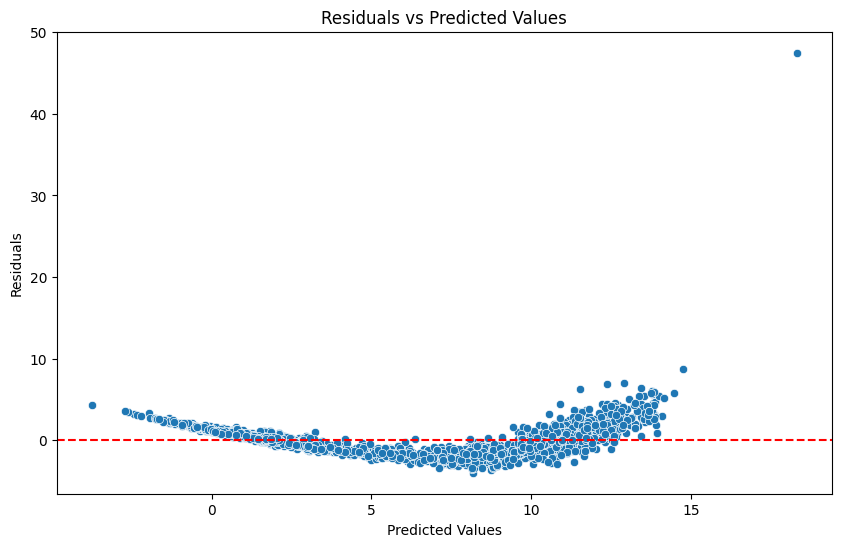

In [26]:
# Vẽ biểu đồ Residuals vs Predicted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.axhline(0, color='red', linestyle='--')
plt.show()

In [ ]:
# Chuyển đổi ILR
ilr_transformed = ilr(data_food + 1e-10)

# Chuyển đổi thành DataFrame
ilr_df = pd.DataFrame(ilr_transformed)
ilr_df.head()

,0,1,2,3,4,5,6
0,0.067562,0.397954,0.614032,1.924838,0.295199,1.639247,19.352179
1,0.202810,-0.122025,0.306815,1.752830,0.200767,1.280371,1.950223
2,0.046621,1.181300,1.788179,1.746052,0.708528,0.431850,3.015005
3,0.121463,0.858390,0.615105,2.937672,0.174590,0.358500,2.715738
4,0.101430,0.462634,0.748247,2.451362,0.095123,0.603444,2.222318


In [ ]:
# Chọn một biến tham chiếu, ví dụ, biến cuối cùng
alr_transformed = alr(data_food + 1e-10, denominator_idx=-1)

# Chuyển đổi thành DataFrame
alr_columns = [f'{col}/denominator' for col in eat_and_drink[:-1]]
alr_df = pd.DataFrame(alr_transformed, columns=alr_columns)
alr_df.head()

,Bread and Cereals Expenditure/denominator,Total Rice Expenditure/denominator,Meat Expenditure/denominator,Total Fish and marine products Expenditure/denominator,Fruit Expenditure/denominator,Vegetables Expenditure/denominator,Restaurant and hotels Expenditure/denominator
0,21.813087,21.717539,21.277920,20.893825,19.273559,20.671812,19.170702
1,2.893203,2.606387,2.899244,2.445332,0.751318,2.099168,0.899484
2,4.841032,4.775100,3.361275,2.260991,1.857455,2.643018,2.823361
3,4.261212,4.089437,3.124016,3.114626,0.362905,2.799185,2.571339
4,3.510971,3.367528,2.872641,2.386378,0.293674,2.382036,1.817077


Mean Squared Error: 2.770051356808248
R^2 Score: 0.8820660779125785


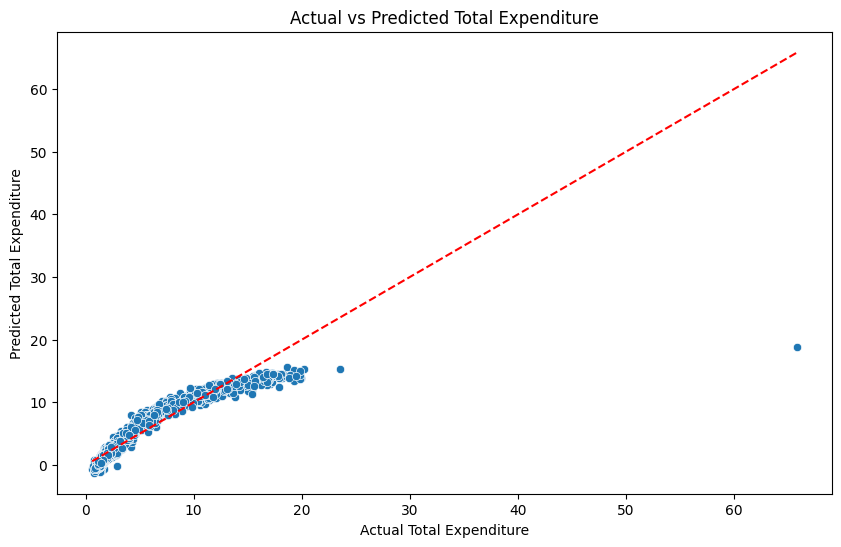

In [28]:
#mô hình không sử dụng CoDA
# Loại bỏ các điểm bất thường
y = dataframe['residual sugar']

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Vẽ biểu đồ Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Total Expenditure')
plt.ylabel('Predicted Total Expenditure')
plt.title('Actual vs Predicted Total Expenditure')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
